## Startup Funding Analysis



In this case study I will be analyzing  the data and then will answer the few of the following questions. I will be using basic Python Modules like PANDAS , NUMPY and MATPLOTLIB. The dataset was acquired from KAGGLE. The Questions are as follows:-

#### Question 1

Check the trend of investments over the years. To check the trend, find 
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
year_count={}
data_df  = pd.read_csv('startup_funding.csv')
for i in data_df.Date:
    if i[-4:] in year_count:
        year_count[i[-4:]] += 1
    else:
        year_count[i[-4:]] = 1

dict_items = year_count.items()
dict_items = sorted(dict_items)
dict_items
year = []
count = []
for i in range(len(dict_items)):
    year.append(dict_items[i][0])
    count.append(dict_items[i][1])
    
for i in range(len(year)):
    print(year[i],count[i])

2015 936
2016 993
2017 443


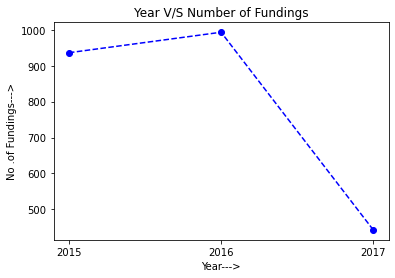

In [9]:
#LINE GRAPH FOR SHOWING THE TRENDS of FUNDING EACH YEAR

plt.plot(year,count,'b--o')
plt.title('Year V/S Number of Fundings')
plt.xlabel('Year--->')
plt.ylabel('No .of Fundings--->')
plt.show()

#### Question 2

Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')


for i in data.CityLocation:
    if i == 'Delhi':
        data.CityLocation.replace('Delhi','New Delhi',inplace = True)
    if i == 'bangalore':
        data.CityLocation.replace('bangalore','Bangalore',inplace = True)

data.dropna(subset = ['CityLocation'],inplace=True)

def CityName(string):
    return str(string).split('/')[0].strip()
city_count = data.CityLocation.apply(CityName)

city_count = city_count.value_counts()

city = city_count.index
count = city_count.values

city = city[0:10]
count = count[0:10]

for i in range(len(city)):
    print(city[i],count[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


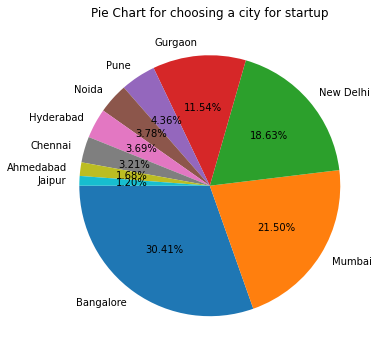

In [21]:
# Plotting the PIE CHART FOR the Suitable representaion of the folowing question
plt.figure(figsize = (16,6))
plt.pie(count,labels = city,autopct='%.2f%%',startangle = 180)
plt.title('Pie Chart for choosing a city for startup')

plt.show()

#### Question3
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('startup_funding.csv')
data.drop(data.columns[0],inplace = True,axis = 1)
data.loc[data['CityLocation']=='Delhi','CityLocation'] = 'New Delhi'
data.loc[data['CityLocation']=='bangalore','CityLocation'] = 'Bangalore'
data.AmountInUSD.fillna(0,inplace=True)
data.dropna(subset = ['CityLocation'],inplace=True)
data.reset_index(inplace=True,drop= True)
def ret_city(city):
    return city.split('/')[0].strip()
data['CityLocation'] = data.CityLocation.apply(ret_city)
def ret_int_amt(string):
    return (''.join(str(string).split(',')))
data['AmountInUSD'] = data.AmountInUSD.apply(ret_int_amt)
data['AmountInUSD'] = data.AmountInUSD.astype(float)
city_amount = data[['CityLocation','AmountInUSD']]
amount_by_city = city_amount.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)
amount = amount_by_city.values[0:10]
city = amount_by_city.index[0:10]
amount_per = (amount/amount.sum())*100
for i in range(len(city)):
    print(city[i],format(amount_per[i],'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


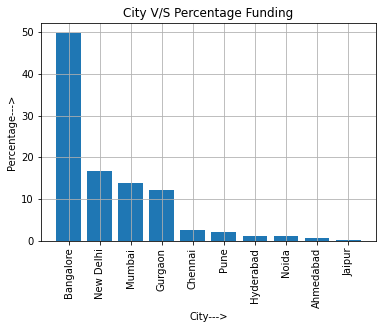

In [28]:
#Plotting a Bar Chart for comparing the Funding According to City

plt.bar(city,amount_per)
plt.title('City V/S Percentage Funding')
plt.xlabel('City--->')
plt.ylabel('Percentage--->')
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Question 4
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
data.drop(data.columns[0],inplace = True,axis = 1)
data.dropna(subset = ['InvestmentType'],inplace=True)

data.InvestmentType.replace('SeedFunding','Seed Funding',inplace = True)
data.InvestmentType.replace('PrivateEquity','Private Equity',inplace = True)
data.InvestmentType.replace('Crowd funding','Crowd Funding',inplace = True)

data.loc[data['AmountInUSD'].isna(),'AmountInUSD'] = '0'

def ret_int_amt(string):
    return (float(str(string).replace(',','')))
data['AmountInUSD'] = data.AmountInUSD.apply(ret_int_amt)

funding_amount = data[['InvestmentType','AmountInUSD']]

funding_amount = funding_amount.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)


funding = funding_amount.index
amount = funding_amount.values
amount_per = (amount / amount.sum())*100

amount_per = (amount/amount.sum())*100
for i in range(len(funding)):
    print(funding[i],format(amount_per[i],'.5f'))

Private Equity 98.14523
Seed Funding 1.81141
Debt Funding 0.04251
Crowd Funding 0.00085


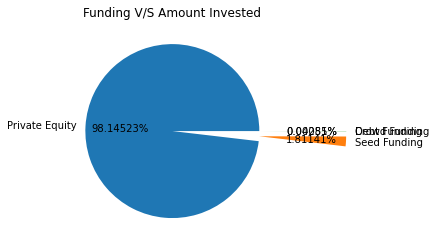

In [39]:
# Plotting the Pie Chart For the visualizing the different types of funding
plt.pie(amount_per,labels = funding,autopct = '%.5f%%',explode = [0,1,1,1])
plt.title('Funding V/S Amount Invested')
plt.show()

#### Question 5
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('startup_funding.csv')
data.drop(data.columns[0],axis = 1,inplace = True)

def ret_int_amt(string):
    return (float(str(string).replace(',','')))
data['AmountInUSD'] = data.AmountInUSD.apply(ret_int_amt)

data.IndustryVertical.replace('eCommerce','ECommerce',inplace=True)
data.IndustryVertical.replace('ecommerce','ECommerce',inplace=True)
data.IndustryVertical.replace('Ecommerce','ECommerce',inplace=True)

industry_funding = data.groupby('IndustryVertical')['AmountInUSD'].sum()

industry_funding.sort_values(inplace=True,ascending=False)

industry = industry_funding.index[0:5] 
funding = industry_funding.values[0:5]

funding_per = (funding/funding.sum())*100
for i in range(len(industry)):
    print(industry[i],format(funding_per[i],'.2f'))

ECommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


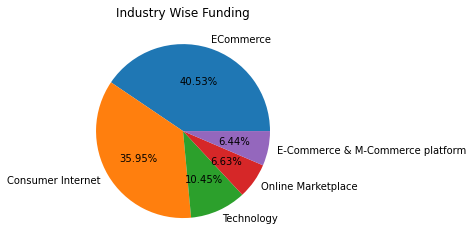

In [41]:
#Plotting a Pie Chart for Visual Representaion

plt.pie(funding_per,labels = industry,autopct='%.2f%%')
plt.title('Industry Wise Funding')
plt.show()

#### Question 6
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
data.drop(data.columns[0],axis=1,inplace = True)

for i in data.StartupName:
    if 'Oyo' in i:
        data.StartupName.replace(i,'Oyo',inplace = True)
    if 'Paytm' in i:
        data.StartupName.replace(i,'Paytm',inplace = True)
    if 'Ola' in i:
        data.StartupName.replace(i,'Ola',inplace = True)
    if 'Flipkart' in i:
        data.StartupName.replace(i,'Flipkart',inplace = True)
        
data.loc[data['AmountInUSD'].isna(),'AmountInUSD'] = '0'

def ret_int_amt(string):
    return (float(str(string).replace(',','')))
data['AmountInUSD'] = data.AmountInUSD.apply(ret_int_amt)

startup_funding = data.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)
for i in range(5):
    print(startup_funding.index[i])
startup = startup_funding.index[0:5]
funding_amt = startup_funding.values[0:5]

Paytm
Flipkart
Ola
Snapdeal
Oyo


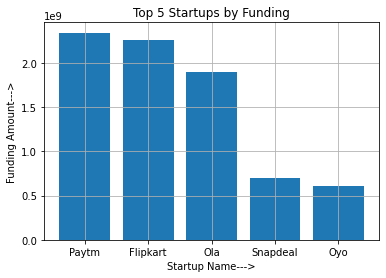

In [46]:
#Plotting Bar Plot For Visulizing the Startups
plt.bar(startup,funding_amt)
plt.title('Top 5 Startups by Funding')
plt.xlabel('Startup Name--->')
plt.ylabel('Funding Amount--->')
plt.grid()
plt.show()

#### Question 7
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
data.drop(data.columns[0],axis=1,inplace = True)

for i in data.StartupName:
    if 'Oyo' in i or 'OYO Rooms' in i:
        data.StartupName.replace(i,'Oyo',inplace = True)
    if 'Paytm' in i:
        data.StartupName.replace(i,'Paytm',inplace = True)
    if 'Ola' in i:
        data.StartupName.replace(i,'Ola',inplace = True)
    if 'Flipkart' in i:
        data.StartupName.replace(i,'Flipkart',inplace = True)
        
startup_count = data.StartupName.value_counts()[0:5]

for i in range(5):
    print(startup_count.index[i],startup_count.values[i])

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


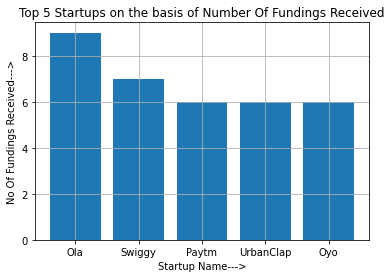

In [51]:
#Plotting the Graph for the following Question

plt.bar(startup_count.index[0:5],startup_count.values[0:5])
plt.title('Top 5 Startups on the basis of Number Of Fundings Received')
plt.xlabel('Startup Name--->')
plt.ylabel('No Of Fundings Received--->')
plt.grid()
plt.show()

#### Question 8
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
data.drop(data.columns[0],axis=1,inplace = True)

data.dropna(subset = ['InvestorsName'],inplace =True)
investors = []
for i in data.InvestorsName:
    if 'undisclosed' not in i or 'Undisclosed' not in i:
        for j in i.split(','):
            j = j.strip()
            if j in investors:
                investors.append(j)
            else:
                investors.append(j)
df = pd.DataFrame(investors,columns = ['Investors'])
                
print(df.Investors.value_counts().index[0],df.Investors.value_counts().values[0])

Sequoia Capital 64


## Conclusion

This was my first attempt on Data Analysis using Python. I was about to answer few very intriguing questions that made sense. Would Explore more as I learn more in depth concepts 